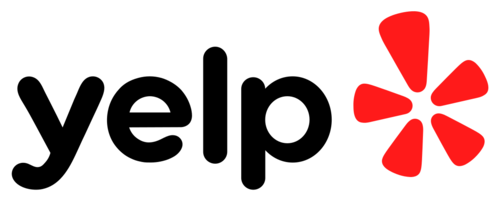

<h1> <center> Sentiment Analysis of the Yelp Reviews Using NLP and Topic Modelling</center> </h1>

<center> Leena AlQasem (leenabdulh@gmail.com)      ||  Randa Mohammed (randa1414@gmail.com) </center> 

## Table of content: 

  * [Importing libreries](#first)
  * [Data Exploration and Assessing](#second)
  * [Data Analysis and Visulizations](#Forth)
  * [Text Preprocessing](#Fifth)
  * [Splitting the Data into traning and testing](#sixth)
  * [TF-IDF and Count Vector](#sixth)
  * [Topic Modeling](#sixth)
  * [Experiments the NMF model for Document Topics](#seventh)

## Importing libreries:

In [1]:
#-------------- imports Data exploration and visualization --------------#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#%pylab inline

#-------------- imports Modeles --------------#

import re
import nltk
import itertools
import nltk
import string as st

#nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud



#nltk.download('words')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')

from nltk import pos_tag, ne_chunk

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'

***

## Data Exploration and Assessing

In [3]:
df = pd.read_csv('yelp_restaurants_reviews.csv')

In [4]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
4,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4


In [5]:
print(f"- The dataset contains {df.shape[0]} records with {df.shape[1]} columns.")
print('\n*****************************************************\n')

print(f"\n- The columns data type:\n{df.dtypes}") 
print('\n*****************************************************\n')

print(f"\n- Number of null values:\n{df.isnull().sum()}")
print('\n*****************************************************\n')

print("\n- The dataset inforomation:\n")
df.info()

- The dataset contains 6911 records with 10 columns.

*****************************************************


- The columns data type:
business_id    object
date           object
review_id      object
stars           int64
text           object
type           object
user_id        object
cool            int64
useful          int64
funny           int64
dtype: object

*****************************************************


- Number of null values:
business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

*****************************************************


- The dataset inforomation:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6911 entries, 0 to 6910
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  6911 non-null   object
 1   date         6911 non-null   object
 2   revi

In [6]:
df.business_id.value_counts()

ntN85eu27C04nwyPa8IHtw    37
JokKtdXU7zXHcr20Lrk29A    37
WNy1uzcmm_UHmTyR--o5IA    32
VVeogjZya58oiTxK7qUjAQ    31
V1nEpIRmEa1768oj_tuxeQ    30
                          ..
3DMvGD8ZmlMQmhwV66hdSA     1
TnKMo7BnsbqFaeNL1GY3og     1
Jt1tVmCN1jwnXc3sSULqTQ     1
VXuvmtDipL_WRwc0NTM3iQ     1
1_siFXaQbxck3tiKRwnq7Q     1
Name: business_id, Length: 2255, dtype: int64

## Data Analysis and Visulizations

***Visulize the highest score for the starts***

In [7]:
df.stars.value_counts()

4    2603
5    2091
3    1060
2     683
1     474
Name: stars, dtype: int64

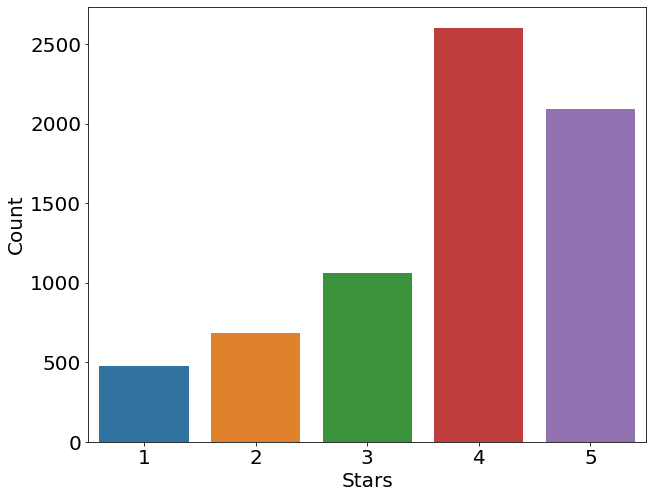

In [8]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 20})
sns.countplot('stars', data = df)
plt.ylabel('Count')
plt.xlabel('Stars');

***

***Visulize Number of both the Positive Reviews and Negative Reviews***

In [9]:
df["is_bad_review"] = df["stars"].apply(lambda x: "Negative Reviews" if x <= 2 else "Positive Reviews")
reviews_df_plot = df[["text", "is_bad_review"]]
reviews_df_plot.head(5)

,text,is_bad_review
0,My wife took me here on my birthday for breakf...,Positive Reviews
1,I have no idea why some people give bad review...,Positive Reviews
2,love the gyro plate. Rice is so good and I als...,Positive Reviews
3,"Quiessence is, simply put, beautiful. Full wi...",Positive Reviews
4,Drop what you're doing and drive here. After I...,Positive Reviews


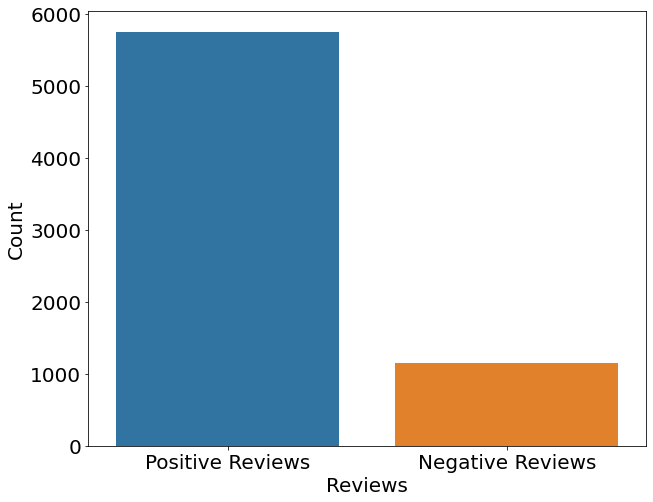

In [10]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 20})
sns.countplot('is_bad_review', data = reviews_df_plot)
#plt.legend(labels=["Good Reviews = 1","Bad Reviews = 0"], bbox_to_anchor = (1,1))

plt.ylabel('Count')
plt.xlabel('Reviews');

***Visulize ALL positive and negative words Using Word Cloud***

In [11]:
df["is_bad_review"] = df["stars"].apply(lambda x: 0 if x <= 2 else 1)
reviews_df = df[["text", "is_bad_review"]]
reviews_df.head(5)

,text,is_bad_review
0,My wife took me here on my birthday for breakf...,1
1,I have no idea why some people give bad review...,1
2,love the gyro plate. Rice is so good and I als...,1
3,"Quiessence is, simply put, beautiful. Full wi...",1
4,Drop what you're doing and drive here. After I...,1


In [12]:
text = " ".join(review for review in reviews_df.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 4986046 words in the combination of all review.


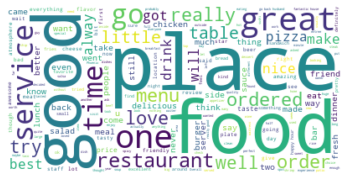

In [13]:
wordcloud = WordCloud(background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

***

In [14]:
reviews_df.is_bad_review.value_counts()

1    5754
0    1157
Name: is_bad_review, dtype: int64

***Visulize ALL positive words***

In [15]:
df_pos =reviews_df[reviews_df['is_bad_review']==1]
df_pos.head(5)

,text,is_bad_review
0,My wife took me here on my birthday for breakf...,1
1,I have no idea why some people give bad review...,1
2,love the gyro plate. Rice is so good and I als...,1
3,"Quiessence is, simply put, beautiful. Full wi...",1
4,Drop what you're doing and drive here. After I...,1


In [16]:
text_pos = " ".join(review for review in df_pos.text)
print ("There are {} words in the combination of all review.".format(len(text_pos)))


There are 4010478 words in the combination of all review.


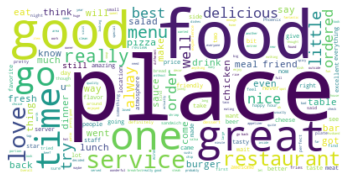

In [17]:
wordcloud = WordCloud(background_color="white").generate(text_pos)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

***

***Visulize ALL negative words***

In [18]:
df_neg =reviews_df[reviews_df['is_bad_review']==0]
df_neg.head(5)

,text,is_bad_review
10,Was it worth the 21$ for a salad and small piz...,0
21,Disgusting! Had a Groupon so my daughter and ...,0
24,"I've eaten here many times, but none as bad as...",0
40,I have to add to Andrew's review.....\r\n\r\nI...,0
46,Another night meeting friends here. I have to...,0


In [19]:
text_neg = " ".join(review for review in df_neg.text)
print ("There are {} words in the combination of all review.".format(len(text_neg)))


There are 975567 words in the combination of all review.


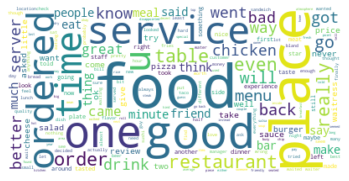

In [20]:
wordcloud = WordCloud(background_color="white").generate(text_neg)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

***

***Creates new dataframe with only text column***

In [21]:
df_text = df[['text']]

## Text Preprocessing 

In [22]:
def preprocosseing(text):
    #if detect('convert words to feature vectors') == 'en':
        # remove urls
    text = re.sub(r'https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', ' ', text)
        # remove punctuations 
    text = ("".join([ch for ch in text if ch not in st.punctuation]))
        # remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
        # lower casing
    text = text.lower()
        # convert text to tokens
    text = re.split('\s+' ,text)
    tokens = [x.lower() for x in text]
        # remove stopwords using NLTK corpus stopwords list to match
    tokens = [word for word in text if word not in nltk.corpus.stopwords.words('english')]
        # apply lemmatization
    word_net = WordNetLemmatizer()
    tokens = [word_net.lemmatize(word) for word in tokens]
        # convert words to feature vectors
    text = " ".join([word for word in tokens])
        
    return text

In [23]:
pd.set_option('max_colwidth', -1)

In [24]:
df_text['text_cleand'] = df['text'].apply(lambda x : preprocosseing(x))

In [25]:
df_pos['text_cleand'] = df_pos['text'].apply(lambda x : preprocosseing(x))

In [26]:
df_neg['text_cleand'] = df_neg['text'].apply(lambda x : preprocosseing(x))

## Splitting the Data into traning and testing 

In [27]:
X_train, X_test= train_test_split(df_text, test_size=0.1, random_state=111)

In [28]:
X_train_n, X_test_n = train_test_split(df_neg, test_size=0.1, random_state=111)

In [29]:
X_train_p, X_test_p = train_test_split(df_pos, test_size=0.1, random_state=111)

## TF-IDF and Count Vector

### 1. TF-IDF

**1. TF-IDF on the positive Reviews**

In [30]:
vectorizer_idf_n = TfidfVectorizer(min_df=10, 
                        stop_words='english', 
                        token_pattern='[a-zA-Z0-9]{3,}')

tfidf_n = vectorizer_idf_n.fit_transform(X_train_n.text_cleand)

In [31]:
print(tfidf_n.A)
print("\n")
print(vectorizer_idf_n.get_feature_names())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.22159145 ... 0.         0.         0.        ]
 ...
 [0.         0.06477394 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


['able', 'absolutely', 'actual', 'actually', 'add', 'added', 'additional', 'admit', 'adult', 'afternoon', 'ago', 'agreed', 'ahead', 'ala', 'alright', 'amazing', 'ambiance', 'american', 'annoyed', 'annoying', 'answer', 'anymore', 'anyways', 'apart', 'apologized', 'apology', 'apparently', 'appeared', 'appetizer', 'apple', 'appreciate', 'area', 'arent', 'arizona', 'arrive', 'arrived', 'asian', 'aside', 'ask', 'asked', 'asking', 'assume', 'asu', 'ate', 'atmosphere', 'attempt', 'attention', 'attentive', 'attitude', 'authentic', 'available', 'average', '

**2. TF-IDF on the Negative Reviews**

In [32]:
vectorizer_idf_p = TfidfVectorizer(min_df=10, stop_words='english', 
                        token_pattern='[a-zA-Z0-9]{3,}')

tfidf_p = vectorizer_idf_p.fit_transform(X_train_p.text_cleand)

In [33]:
print(tfidf_p.A)
print("\n")
print(vectorizer_idf_p.get_feature_names())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


['ability', 'able', 'absolute', 'absolutely', 'accept', 'acceptable', 'accident', 'accommodate', 'accommodating', 'accomodating', 'accompanied', 'accompany', 'accompanying', 'according', 'account', 'act', 'actual', 'actually', 'add', 'added', 'addicted', 'addictive', 'adding', 'addition', 'additional', 'address', 'adequate', 'admit', 'adorable', 'adore', 'adult', 'advantage', 'adventure', 'adventurous', 'advice', 'afford', 'affordable', 'afraid', 'afternoon', 'age', 'ago', 'agree', 'agreed', 'ahead', 'ahi', 'ahwatukee', 'aint', 'aioli', 'air', 'airport', 'airy', 'ajs', 'aka', 'ala', 'albeit', 'alcohol', 'ale', 'alfredo', 'allergy', 'allow', 'allowed', 'almond', 'alot', 'alright', 'alternative', 'amazed', 'amazing', 'amazingly', 'amber', 'ambiance', 'ambience', 'america', 'american', 'americanized', 'ample', 'andor', 'angel', 'anni

### 2. Count Vector

In [34]:
vectorizer_countvector = CountVectorizer(analyzer='word',       
                             min_df=10,                       
                             stop_words='english',             
                             lowercase=True,                   
                             token_pattern='[a-zA-Z0-9]{3,}'  
                            )
countvector = vectorizer_countvector.fit_transform(X_train.text_cleand)

In [35]:
print(countvector.A)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


> **Note:** We Choose TF-IDF as our technique, because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words.

***

## Topic Modeling

### 1. LDA

   **1. Training the model on the positive Reviews**

In [36]:
lda = decomposition.LatentDirichletAllocation(n_components=5, max_iter=3, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)

W1 = lda.fit_transform(tfidf_p)
H1 = lda.components_

In [37]:
print(W1.shape)
print(H1.shape)

(5178, 5)
(5, 2884)


In [38]:
num_words=15

vocab = np.array(vectorizer_idf_p.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics_p = [' '.join(t) for t in topic_words]
topics_p

['heated boba vermicelli pho great burger awesome good food place service fry egg ive like',
 'excellent food love place best service sandwich time parking menu friendly amazing like bit gluten',
 'good food place great time like service love really pizza best restaurant chicken nice delicious',
 'rank insane realized bull pizza southern food fountain hard great good place slice really restaurant',
 'jimmy john thai pad great food salad place service lunch soon good chicken try time']

   **2. Training the model on the Negatives Reviews**

In [39]:
lda = decomposition.LatentDirichletAllocation(n_components=5, max_iter=3, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)

W2 = lda.fit_transform(tfidf_n)
H2 = lda.components_

In [40]:
print(W2.shape)
print(H2.shape)

(1041, 5)
(5, 1061)


In [41]:
num_words=15

vocab = np.array(vectorizer_idf_n.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H2])
topics_n = [' '.join(t) for t in topic_words]
topics_n

['drive refused phone food order service place business time burrito hour price menu good great',
 'closed wasted food location update service place good burger anymore slow better cheese ice great',
 'food place good parking sick bad instead right great quick meal staff min serve pizza',
 'poor fry horrible order food think experience place waste better dont service expensive like wrong',
 'food place good like time service restaurant ordered bad dont order really better great got']

### 2. NMF

   **1. Training the model on the positive Reviews**

In [42]:
clf_p = decomposition.NMF(n_components=3, random_state=111)
W3 = clf_p.fit_transform(tfidf_p)
H3 = clf_p.components_

In [43]:
num_words=10 

vocab = np.array(vectorizer_idf_p.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H3])
nmf_topics_p = [' '.join(t) for t in topic_words]
nmf_topics_p

['good like place time really chicken burger dont little sandwich',
 'great food service place good love price staff friendly happy',
 'pizza crust salad good slice best wing pepperoni place topping']

   **2. Training the model on the Negatives Reviews**

In [44]:
clf_n = decomposition.NMF(n_components=3, random_state=111)
W4 = clf_n.fit_transform(tfidf_n)
H4 = clf_n.components_

In [45]:
num_words=6

vocab = np.array(vectorizer_idf_n.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H4])
nmf_topics_n = [' '.join(t) for t in topic_words]
nmf_topics_n

['burger chicken like pizza ordered sauce',
 'table minute order server time drink',
 'food place service bad good restaurant']

### 3. LSA

   **1. Training the model on the positive Reviews**

In [46]:
lsa_p = TruncatedSVD(5)
doc_topic_p = lsa_p.fit_transform(tfidf_p)

In [47]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [48]:
display_topics(lsa_p, vectorizer_idf_p.get_feature_names(), 10)


Topic  0
good, food, place, great, time, like, service, really, love, pizza

Topic  1
great, food, service, price, love, place, staff, atmosphere, sushi, happy

Topic  2
pizza, great, crust, beer, service, wine, love, salad, hour, selection

Topic  3
burger, fry, great, beer, happy, hour, sandwich, bar, sweet, potato

Topic  4
happy, hour, sushi, bar, drink, wine, night, roll, beer, menu


   **2. Training the model on the Negatives Reviews**

In [49]:
lsa_n = TruncatedSVD(5)
doc_topic_n = lsa_n.fit_transform(tfidf_n)

In [50]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [51]:
display_topics(lsa_n, vectorizer_idf_n.get_feature_names(), 10)


Topic  0
food, place, good, like, time, service, restaurant, order, ordered, table

Topic  1
minute, table, server, order, drink, hour, service, waited, wait, bar

Topic  2
food, service, bad, restaurant, place, mexican, chinese, slow, great, better

Topic  3
pizza, place, slice, wing, better, burger, location, service, crust, isnt

Topic  4
burger, fry, patty, bun, guy, bad, customer, place, great, staff


> **After some experimental trials:**  We found that NMF was the most model that make more sense among all the models. Therefore, it will be our model for the topic modeling.

***

## Experiments the NMF model for Document Topics

In [52]:
colnames = ["Topic" + str(i) for i in range(clf_n.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_train_n.text_cleand))]
df_doc_topic = pd.DataFrame(np.round(W4, 3), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic
df_doc_topic

,Topic0,Topic1,Topic2,dominant_topic
Doc0,0.130,0.000,0.046,0
Doc1,0.016,0.030,0.067,2
Doc2,0.002,0.076,0.028,1
Doc3,0.000,0.026,0.082,2
Doc4,0.000,0.153,0.097,1
...,...,...,...,...
Doc1036,0.022,0.106,0.093,1
Doc1037,0.131,0.000,0.035,0
Doc1038,0.136,0.045,0.017,0
Doc1039,0.057,0.000,0.119,2


**1. Experiments the NMF model on the Negative Reviews (Training)**

In [53]:
colnames = ["Food","Service","atmosphere"]
docnames = ["Doc" + str(i) for i in range(len(X_train_n.text_cleand))]
df_doc_topic = pd.DataFrame(np.round(W4, 3), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic
df_doc_topic

,Food,Service,atmosphere,dominant_topic
Doc0,0.130,0.000,0.046,0
Doc1,0.016,0.030,0.067,2
Doc2,0.002,0.076,0.028,1
Doc3,0.000,0.026,0.082,2
Doc4,0.000,0.153,0.097,1
...,...,...,...,...
Doc1036,0.022,0.106,0.093,1
Doc1037,0.131,0.000,0.035,0
Doc1038,0.136,0.045,0.017,0
Doc1039,0.057,0.000,0.119,2


In [54]:
df_doc_topic.dominant_topic.value_counts()

2    409
0    339
1    293
Name: dominant_topic, dtype: int64

**1. Experiments the NMF model on the Positive Reviews (Training)**

In [55]:
colnames = ["atmosphere", "service", "Food"]
docnames = ["Doc" + str(i) for i in range(len(X_train_p.text_cleand))]
df_doc_topic = pd.DataFrame(np.round(W3, 3), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic
df_doc_topic

,atmosphere,service,Food,dominant_topic
Doc0,0.039,0.035,0.005,0
Doc1,0.040,0.043,0.000,1
Doc2,0.007,0.006,0.006,0
Doc3,0.034,0.004,0.000,0
Doc4,0.043,0.000,0.005,0
...,...,...,...,...
Doc5173,0.025,0.061,0.000,1
Doc5174,0.064,0.027,0.000,0
Doc5175,0.058,0.020,0.004,0
Doc5176,0.050,0.000,0.000,0


In [56]:
df_doc_topic.dominant_topic.value_counts()

0    3279
1    1513
2    386 
Name: dominant_topic, dtype: int64

***

## Testing the Models

   **1. Testing the model on the Positive Reviews**

* TF-IDF:

In [57]:
vectorizer_idf_p = TfidfVectorizer(min_df=10, 
                        stop_words='english', 
                        token_pattern='[a-zA-Z0-9]{3,}')

tfidf_test_p = vectorizer_idf_p.fit_transform(X_test_p.text_cleand)

* NMF Modeling:

In [58]:
clf_test_p = decomposition.NMF(n_components=3, random_state=111)
W5 = clf_test_p.fit_transform(tfidf_test_p)
H5 = clf_test_p.components_

* Experiments the NMF model on the Positive Reviews (Testing)

In [59]:
colnames = ["atmosphere", "service", "Food"]
docnames = ["Doc" + str(i) for i in range(len(X_test_p.text_cleand))]
df_doc_topic = pd.DataFrame(np.round(W5, 3), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic
df_doc_topic.head(10)

,atmosphere,service,Food,dominant_topic
Doc0,0.138,0.005,0.016,0
Doc1,0.079,0.000,0.040,0
Doc2,0.088,0.006,0.055,0
Doc3,0.082,0.015,0.050,0
Doc4,0.060,0.008,0.135,2
Doc5,0.125,0.000,0.065,0
Doc6,0.046,0.000,0.021,0
Doc7,0.044,0.000,0.093,2
Doc8,0.086,0.000,0.000,0
Doc9,0.117,0.000,0.065,0


In [60]:
df_doc_topic.dominant_topic.value_counts()

0    385
2    142
1    49 
Name: dominant_topic, dtype: int64

In [61]:
X_test_p.head(10)

,text,is_bad_review,text_cleand
6564,"Good reviews are easy to write. Stop reading this and just go eat there! \r\n\r\nOK, well I have visited this place for years now and don't go anywhere else if I am in this area. \r\n\r\nI like the Chef's, they are friendly and quick. They speak pretty good Spanish to me and but I don't dare try to respond in Japanese, ha ha. \r\n\r\nThe value is phenomenal, where can two people get miso soup, salad, beans, tea, ice cream and sushi rolls all for under $20? \r\n\r\nI've tried the same at Say Sushi in my hometown of Maricopa and can't do it for under $40 or more for two. \r\n\r\nAll you can eat is available but I find that ordering individually is more economical. \r\n\r\nGreat atmosphere for a quick lunch or a large party for dinner. \r\n\r\nThe waitresses are Asian and I find that suitable for the restaurant. Some reviews on here complain about them. I don't have any issue with them they have always treated me nice and done their job well. \r\n\r\nI will keep coming back.",1,good review easy write stop reading go eat ok well visited place year dont go anywhere else area like chef friendly quick speak pretty good spanish dont dare try respond japanese ha ha value phenomenal two people get miso soup salad bean tea ice cream sushi roll ive tried say sushi hometown maricopa cant two eat available find ordering individually economical great atmosphere quick lunch large party dinner waitress asian find suitable restaurant review complain dont issue always treated nice done job well keep coming back
193,"we went here for dinner and drinks, and it was awesome. the giant soft pretzels are amazing, buttery, and delicious and are served with a roasted pepper cheese sauce. they are awesome, but get them to share, the butteryness is rich! the prices are reasonable, and the patio is nice to sit out on! even better than the food, service, and prices is the music!! they play an awesome selection of music!!",1,went dinner drink awesome giant soft pretzel amazing buttery delicious served roasted pepper cheese sauce awesome get share butteryness rich price reasonable patio nice sit even better food service price music play awesome selection music
5900,"Great Korean Kalbi and other table top meats.\r\nrest of the dishes wasn't that impressive .\r\nWeekend could be really busy you might need to wait for a while to get your food.\r\nbut weekdays pretty slow.\r\nIf you like Korean BBQ, this is the best place in chandler ,gilbert area.",1,great korean kalbi table top meat rest dish wasnt impressive weekend could really busy might need wait get food weekday pretty slow like korean bbq best place chandler gilbert area
1643,"Very good place to eat.. I go here atleast 3 times a week and the owners are very good people, they always interact with their customers. I pretty much know the owners and everytime I go there they already know what I want. I highly recommend this place.",1,good place eat go atleast time week owner good people always interact customer pretty much know owner everytime go already know want highly recommend place
6495,"This GB is one of our favorite places to stop for snack and good seasonal beer. We try for Sundays to do our shopping in the area and stop here....because it is Happy Hour in the bar area all day long. Great specials on their beers, wine and appetizers. We have tried several of their appetizers, but you can't beat their garlic fries here!! YUM-O!\r\nAnyhow, the service here is always great. The hostess, bartenders and waitress are always friendly and ready to take your order. It is especially nice when the weather is beautiful then they open up the patio/bar area. Great place to watch games...plenty of TV's. I frequent the Mill Ave. location, because I work in the area and it does not compare to the San Tan GB.",1,gb one favorite place stop snack good seasonal beer try sunday shopping area stop herebecause happy hour bar area day long great special beer wine appetizer tried several a

***

   **2. Testing the model on the Negative Reviews**

* TF-IDF:

In [62]:
vectorizer_idf_n = TfidfVectorizer(min_df=10, 
                        stop_words='english', 
                        token_pattern='[a-zA-Z0-9]{3,}')

tfidf_test_n = vectorizer_idf_n.fit_transform(X_test_n.text_cleand)

* NMF Modeling:

In [63]:
clf_test_n = decomposition.NMF(n_components=3, random_state=111)
W6 = clf_test_n.fit_transform(tfidf_test_n)
H6 = clf_test_n.components_

/Users/leenaabdullahqgmail.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


* Experiments the NMF model on the Negative Reviews (Testing):

In [64]:
colnames = ["Food","Service","atmosphere"]
docnames = ["Doc" + str(i) for i in range(len(X_test_n.text_cleand))]
df_doc_topic = pd.DataFrame(np.round(W6, 3), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic
df_doc_topic.head(10)

,Food,Service,atmosphere,dominant_topic
Doc0,0.070,0.232,0.196,1
Doc1,0.174,0.117,0.000,0
Doc2,0.106,0.357,0.037,1
Doc3,0.000,0.145,0.087,1
Doc4,0.098,0.372,0.051,1
Doc5,0.044,0.349,0.014,1
Doc6,0.054,0.000,0.285,2
Doc7,0.295,0.000,0.138,0
Doc8,0.000,0.264,0.165,1
Doc9,0.092,0.121,0.284,2


In [65]:
df_doc_topic.dominant_topic.value_counts()

2    55
1    40
0    21
Name: dominant_topic, dtype: int64

In [66]:
X_test_n.head(10)

,text,is_bad_review,text_cleand
4535,"I had never been to Dominick's and I like trying new restaurants so I was excited to check it out. We had a reservation for 8 pm on Saturday night and when we showed up the restaurant was busy. It definitely is catering to those that want to be seen and show off what they have. As we were walking up they had 6-7 of your finest vehicles backed in right next to the front door.\r\n\r\nCalling it a front door is a little misleading however. I found it interesting for such a nice restaurant to have a revolving door as there entrance. Once inside the door you are greeted by what is a darkened ""Liberace"" type decor. Think big chandeliers and crushed velvet. We were seated promptly for our 8 pm reservation.\r\n\r\nTop line the food was mediocre. We between the 4 of us we ordered the Scallops, Halibut, and the Ribeye as our entrees. For our sides we ordered the potatoes, gnocchi, and creamed corn as our sides. The main issue that we all had with the food was that it was very salty. At one point my buddy across the table asked me "" does yours taste really salty?"". I answered yes and everybody else chimed in that theirs was quite salty as well. I don't know if the chef was having a bad night but if not he needs to pump the brakes on his salt usage!\r\n\r\nFinally this place isn't the cheapest place. I am not one to complain about prices and I eat at fine dining restaurants on a weekly basis as part of my job. Our bill for the 4 of us was $500. We did have a couple drinks a piece but the price we paid did not match the quality of food we received.\r\n\r\nMy advice is to check out the bar for a few drinks and enjoy the people watching. Think Phoenix Open. Otherwise if you are looking for a good steakhouse head across the street to Ocean Club.",0,never dominick like trying new restaurant excited check reservation pm saturday night showed restaurant busy definitely catering want seen show walking finest vehicle backed right next front door calling front door little misleading however found interesting nice restaurant revolving door entrance inside door greeted darkened liberace type decor think big chandelier crushed velvet seated promptly pm reservation top line food mediocre u ordered scallop halibut ribeye entree side ordered potato gnocchi creamed corn side main issue food salty one point buddy across table asked taste really salty answered yes everybody else chimed quite salty well dont know chef bad night need pump brake salt usage finally place isnt cheapest place one complain price eat fine dining restaurant weekly basis part job bill u couple drink piece price paid match quality food received advice check bar drink enjoy people watching think phoenix open otherwise looking good steakhouse head across street ocean club
6798,Have tried this place a few times now we sometimes order it for everyone at work. My impression is that its a step up from Taco Bell.,0,tried place time sometimes order everyone work impression step taco bell
5665,"We kept seeing this place on trips between PHX and San Diego and decided to give it a try. The atmosphere was right out of the 60's/70's era of Space exploration & Sci-Fi and looked promising...until we met the staff. Host & waitress were snooty, had no personalty and devoid of any basic courtesy. \r\nI had the Beef Chimichanga which was rather good and my companions were happy with their Liver Steak. We had to ask for drink refills much to the chagrin our our waitress who looked like she owned stock in Cover Girl. Near the end of our supper she all of the sudden started shamelessly flirting and getting pretty touchy feely (ugh)! We noticed that she did that with other tables and wives/girlfriends didn't appear to appreciate that. This was an obvious technique to garner ""gracious tips for the privilege of her service"". \r\nAt the register the host was very lackadaisical in settling our tab that we could have probably just left without paying and they would hav